In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r"D:\Excel R\Excel R Project\Beds_Occupied.csv")

In [3]:
df.head()

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [4]:
df.shape

(359, 2)

# Data Pre-Processing

#### 4 Business moments

In [5]:
df.mean()

Total Inpatient Beds    241.983287
dtype: float64

In [6]:
df.var()

Total Inpatient Beds    837.340502
dtype: float64

In [7]:
df.kurtosis()

Total Inpatient Beds   -0.60372
dtype: float64

In [8]:
df.skew()

Total Inpatient Beds    0.480804
dtype: float64

In [9]:
df.describe()

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


In [10]:
df.dtypes

collection_date         object
Total Inpatient Beds     int64
dtype: object

In [11]:
df.columns

Index(['collection_date', 'Total Inpatient Beds'], dtype='object')

In [12]:
len(df['Total Inpatient Beds'].unique())
# length of the unique values out of 359 
# that is the remaning 275 values are repeated .

84

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [14]:
df.isnull().sum()

collection_date         0
Total Inpatient Beds    0
dtype: int64

In [15]:
len(df['Total Inpatient Beds'].values)

359

In [16]:
df.collection_date = pd.to_datetime(df.collection_date,format ="%d-%m-%Y")

In [17]:
df.set_index('collection_date',inplace =True)

In [18]:
df.index[0:5]

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19'],
              dtype='datetime64[ns]', name='collection_date', freq=None)

In [19]:
df.dtypes

Total Inpatient Beds    int64
dtype: object

In [20]:
df.head

<bound method NDFrame.head of                  Total Inpatient Beds
collection_date                      
2020-06-15                        293
2020-06-16                        295
2020-06-17                        290
2020-06-18                        291
2020-06-19                        288
...                               ...
2021-06-11                        312
2021-06-12                        212
2021-06-13                        299
2021-06-14                        202
2021-06-15                        220

[359 rows x 1 columns]>

In [21]:
## here we are indexing we acces the time series by using the index 

In [22]:
dt = pd.date_range("06-15-2020","06-15-2021")
idx = pd.DatetimeIndex(dt)
df= df.reindex(idx)

In [23]:
pd.set_option('display.max_rows', df.shape[0]+1) # Here we have NaN values we need to impute these values
print(df)

            Total Inpatient Beds
2020-06-15                 293.0
2020-06-16                 295.0
2020-06-17                 290.0
2020-06-18                 291.0
2020-06-19                 288.0
2020-06-20                 289.0
2020-06-21                 277.0
2020-06-22                 289.0
2020-06-23                 292.0
2020-06-24                 293.0
2020-06-25                 291.0
2020-06-26                 282.0
2020-06-27                 283.0
2020-06-28                 284.0
2020-06-29                 194.0
2020-06-30                 292.0
2020-07-01                 275.0
2020-07-02                 290.0
2020-07-03                 287.0
2020-07-04                 283.0
2020-07-05                 282.0
2020-07-06                 284.0
2020-07-07                 291.0
2020-07-08                 292.0
2020-07-09                 294.0
2020-07-10                 287.0
2020-07-11                 284.0
2020-07-12                 282.0
2020-07-13                 292.0
2020-07-14

In [24]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [25]:
#bfill()==> 207 as nan values
#ffill()==> 213 as the Nan Values
#interpolate ==> method ==linear we got nan value as 213,[211,210,209,208],207
#interpolate ==> method ==pad we got nan value as 213,
#interpolate ==> method ==index we got nan value as 213, keep decreasing

#interpolate ==> method ==barycentric we got nan value as 213,


# using the Forward-fill Missing values
df1 =df.interpolate(method ='time')
df1

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [26]:
df1['Total Inpatient Beds'].std(),df1['Total Inpatient Beds'].mean()

(28.907901436743185, 241.46994535519124)

In [27]:
upper_limit =df1['Total Inpatient Beds'].mean() +2 * df1['Total Inpatient Beds'].std()
print(upper_limit)# above the value 299 is considered as outlier

lower_limit =df1['Total Inpatient Beds'].mean() -2 * df1['Total Inpatient Beds'].std()
print(lower_limit)# below the value 183 is considered as Outlier

299.2857482286776
183.65414248170487


In [28]:
#outliers 
out_liers =df1[(df1['Total Inpatient Beds'] > upper_limit) | (df1['Total Inpatient Beds'] < lower_limit)]
out_liers

,Total Inpatient Beds
2020-07-16,341.0
2021-06-10,322.0
2021-06-11,312.0


# Removing the  Outliers

In [29]:
data =df1[(df1['Total Inpatient Beds'] < upper_limit) & (df1['Total Inpatient Beds'] > lower_limit)]
data

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [30]:
# Check Again for NaN values
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",data.isna().sum())
print("The length of the data",len(data))
print("Total  Unique dates as index column",data.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    0
dtype: int64
The length of the data 363
Total  Unique dates as index column 363


# Data Visualization 

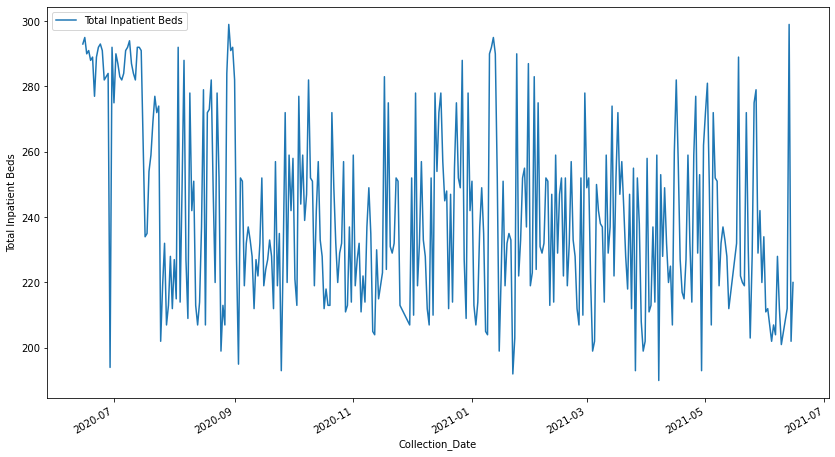

In [31]:
#line PLot of Time Series
rk = data.plot.line(figsize=(14,8))
rk.set_xlabel('Collection_Date')
rk.set_ylabel('Total Inpatient Beds');
# From the plot we can see that the data is stationary.
#the X- axis contains the Time Series variable (collection date)
# the Y-axis contains the Random variable (Total In patient Beds) value ranges from 150-350
# the 

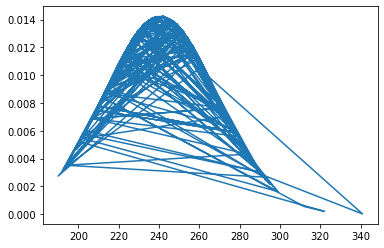

In [32]:
#Normal Distribution
from scipy.stats import norm
import statistics
mean =statistics.mean(data['Total Inpatient Beds'])
std =statistics.stdev(data['Total Inpatient Beds'])

#plt.figsize =(14,10)
plt.plot(df1['Total Inpatient Beds'], norm.pdf(df1['Total Inpatient Beds'], mean, std))
plt.show()
# from this normal distributin we can clearly say that they are two Outliers in the Data  320, and 340
# this is  one of the reason that we are getting for higher variane value =  837.340502 because of the data is spread from 190 to 340
# 320 & 340 (because these two data points in the data is been widely spreaded)

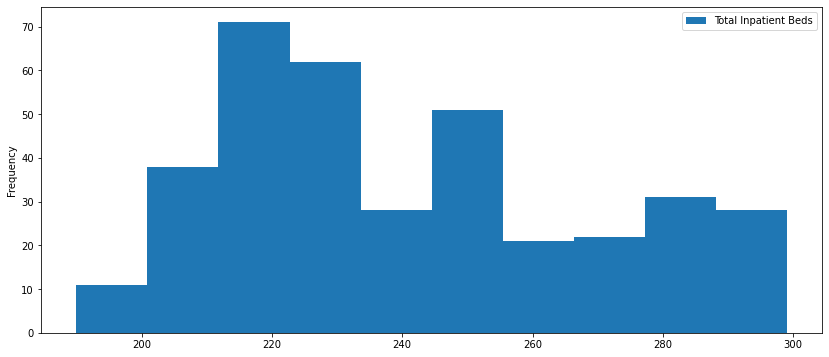

In [33]:
#Histogram Plot
rk1 =data.plot(kind="hist",figsize =(14,6),fontsize =10)
plt.show()

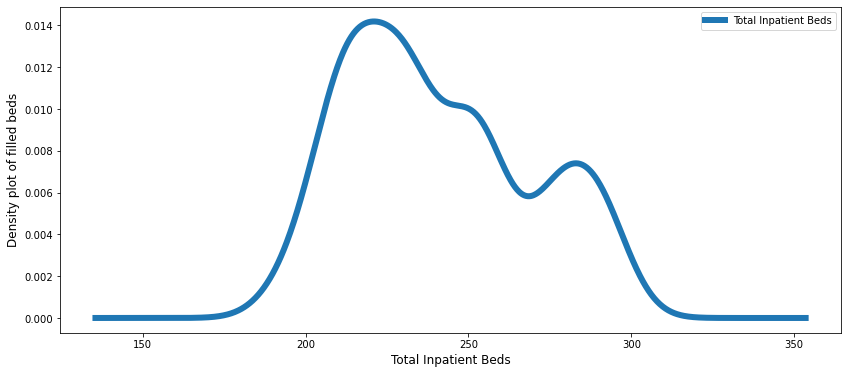

In [34]:
rk2 =data.plot(kind="density",figsize =(14,6),fontsize =10,linewidth=6)
rk2.set_xlabel("Total Inpatient Beds",fontsize =12)
rk2.set_ylabel("Density plot of filled beds",fontsize =12)
plt.show()

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

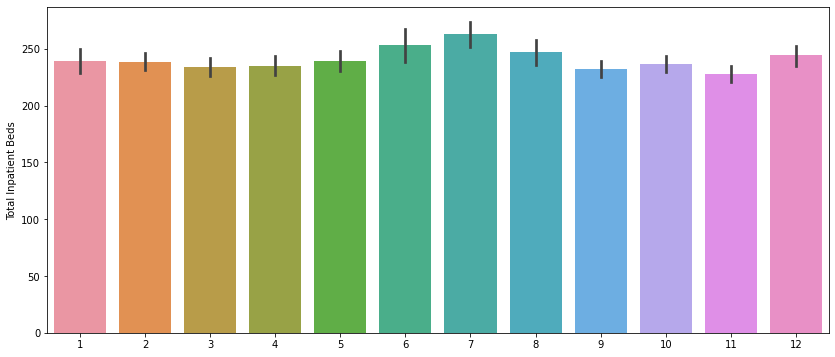

In [35]:
fig, rk4 = plt.subplots(figsize=(14,6))
sns.barplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk4,
            linewidth =4)


C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

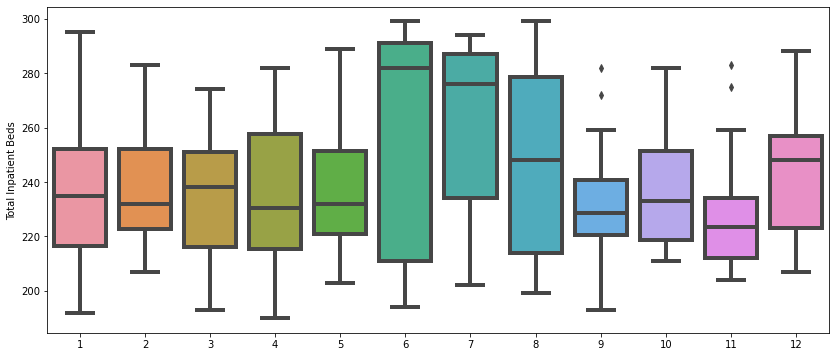

In [36]:
fig, rk3 = plt.subplots(figsize=(14,6))
sns.boxplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk3,
            linewidth =4)

In [37]:
X=data['Total Inpatient Beds'].values
split   =  round(len(X)/2)
X1, X2 =X[0:split],X[split:]
mean1 =X1.mean()
mean2 =X2.mean()
var1 =X1.var()
var2 =X2.var()
print("The Mean  and Variance of 1st half is ",mean1,var1)
print("The Mean  and Variance of 2nd half is ",mean2,var2)
## Here the Mean and variance are  Almost Constant

The Mean  and Variance of 1st half is  244.77472527472528 891.1921084410096
The Mean  and Variance of 2nd half is  236.76243093922653 637.8827874607002


# Checking For Stationary 

In [38]:
# Hypothisis Testing checking for the Stationary or NOt
from statsmodels.tsa.stattools import adfuller
x=data['Total Inpatient Beds'].values
result= adfuller(x)
#print(result)
print('ADF Statistic: %.3f' % result[0])
print("The P-Value:",result[1])
#print('p-value: %.f' % result[1])
print("Lags- Used: %.f" % result[2])
print("The number of Observarions Used is %3.f"% result[3])
print('Critical Values:')
#print("The P-Value:",result[1])
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#The Intuation of Dicky Fuller Test 
#Here the Critical value is Less than 5% , thus the Time Series is Stationary with the 95% confidence

ADF Statistic: -5.575
The P-Value: 1.4367565029913304e-06
Lags- Used: 4
The number of Observarions Used is 358
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Hence the Critical values are less than 5% , Thus the time Series is Stationary with the Confidence of 95% 

In [39]:
# Creating the model
split_point =len(data) -10;
dataset,validation =data[0:split_point],data[split_point:]
print("Dataset %d,Validation %d" %(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header =False)
validation.to_csv('validation.csv',header=False)


Dataset 353,Validation 10


Base Model / Persistance Model

In [116]:
from statsmodels.tsa.stattools import acf, pacf

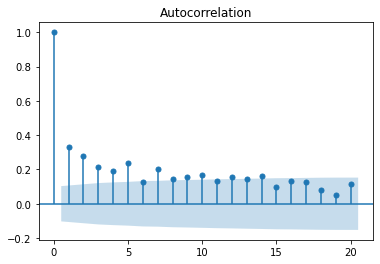

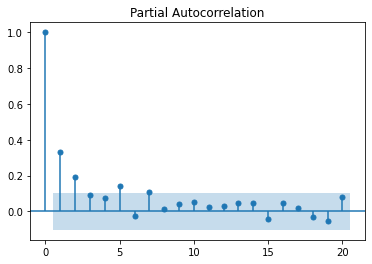

In [52]:
##ACF plots 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Total Inpatient Beds'],lags=20)
plt.show()

#PACF Plots
from statsmodels.graphics.tsaplots import plot_pacf
#df= pd.read_csv(r"C:\Users\RaviKiran\OneDrive\Desktop\Data Science\Data Sets\daily-minimum-temperatures.csv", header=0, index_col=0)
plot_pacf(data,lags= 20)# -1 to +1
plt.show()

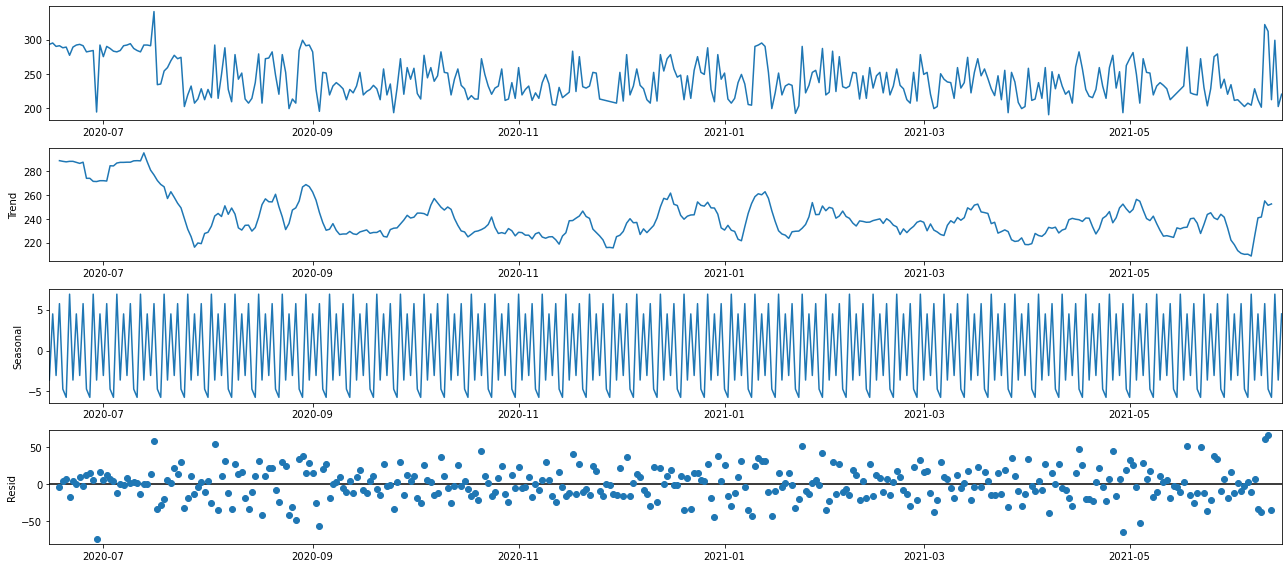

In [112]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()
# we can see that the series is stationary

In [109]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df1, model='multiplicative')
fig = decomposition.plot()
plt.show()
# we can see that the series is stationary

NameError: name 'sm' is not defined

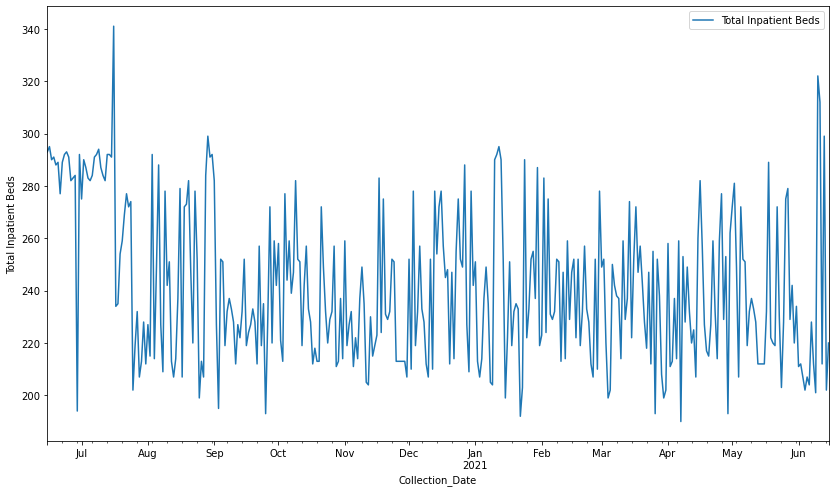

In [72]:
#line PLot of Time Series
rk = df1.plot.line(figsize=(14,8))
rk.set_xlabel('Collection_Date')
rk.set_ylabel('Total Inpatient Beds');
# From the plot we can see that the data is stationary.
#the X- axis contains the Time Series variable (collection date)
# the Y-axis contains the Random variable (Total In patient Beds) value ranges from 150-350
# the 

lets Explore the Data Set in detail like Extracting the month and year from the dataset

<AxesSubplot:>

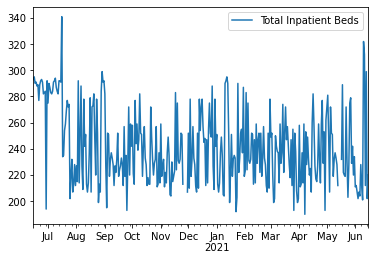

In [51]:
df.plot()

 here i created extra  data frame called df1==> which contains collection_data,Total Inpatient Beds,and months
    from df==> dataframe we have all the columns as df1 in eddtion to year 

In [17]:
df1=pd.DataFrame(data=df,columns =['collection_date','Total Inpatient Beds'])
df['collection_date']=df['collection_date'].astype("str")
df1['month']=0;

# import date time module
from datetime import datetime
for i in range(359):
    x = df1['collection_date'][i]
    df1['month'][i]=x[3:5]

<ipython-input-17-e12c14e26c26>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'][i]=x[3:5]


In [18]:
df['year']= 0;
for j in range(359):
    y =df['collection_date'][j]
    df['year'][j]=y[6:]

<ipython-input-18-32eb235f82a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][j]=y[6:]


In [19]:
df.head()

,collection_date,Total Inpatient Beds,year
0,15-06-2020,293,2020
1,16-06-2020,295,2020
2,17-06-2020,290,2020
3,18-06-2020,291,2020
4,19-06-2020,288,2020


# Data Visualization and Analysis 

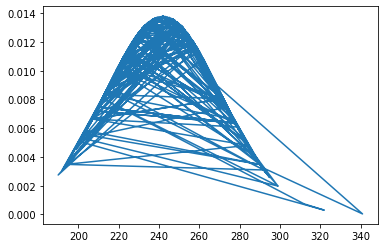

In [21]:
#Normal Distribution
from scipy.stats import norm
import statistics
mean =statistics.mean(df['Total Inpatient Beds'])
std =statistics.stdev(df['Total Inpatient Beds'])


plt.plot(df['Total Inpatient Beds'], norm.pdf(df['Total Inpatient Beds'], mean, std))
plt.show()
# from this normal distributin we can clearly say that they are two Outliers in the Data  320, and 340
# this is  one of the reason that we are getting for higher variane value =  837.340502 
# 320 & 340 (because these two data points in the data is been widely spreaded)

<AxesSubplot:>

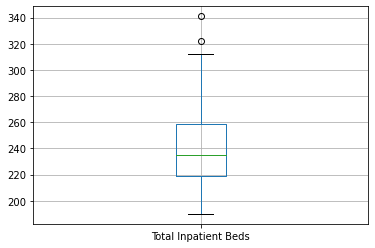

In [22]:
df.boxplot(column=['Total Inpatient Beds'])
# we can clearly visualize the outliers in the data set using the Boxplot

<AxesSubplot:ylabel='Frequency'>

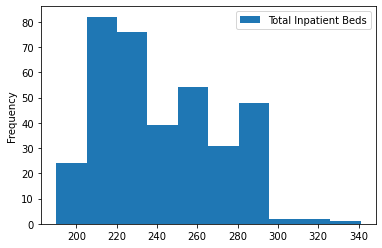

In [47]:
df.plot.hist(df['Total Inpatient Beds'])
#histogram  for Total Inpatient Beds
#which contains right skewed

<AxesSubplot:>

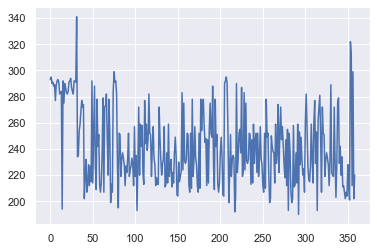

In [98]:
#linePlots
df['Total Inpatient Beds'].plot()

<AxesSubplot:ylabel='Density'>

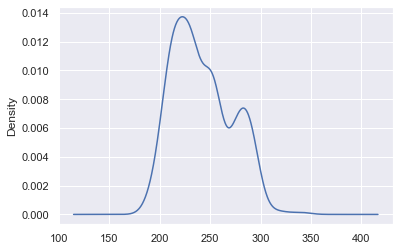

In [51]:
df['Total Inpatient Beds'].plot(kind ="kde") #kde plot
#we have most of the  values of Total Inpatient Beds with in the ranges   from 200 -270

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


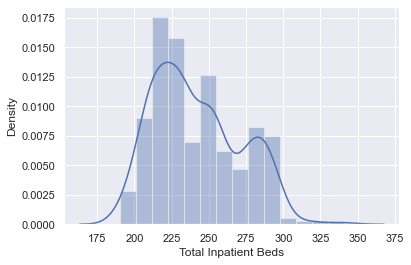

In [49]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(df['Total Inpatient Beds'],kde=True)
#this indicates Negitive Kurtosis which indicates broad peaks(-0.60372)

array([[<AxesSubplot:title={'center':'Total Inpatient Beds'}>]],
      dtype=object)

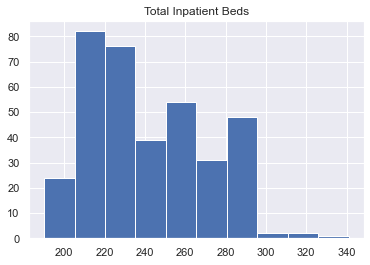

In [52]:
df1.hist()

<AxesSubplot:>

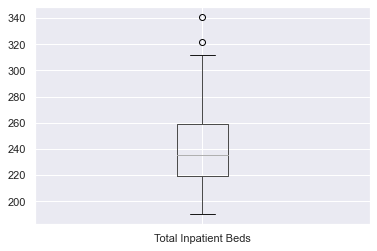

In [53]:
df1.boxplot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

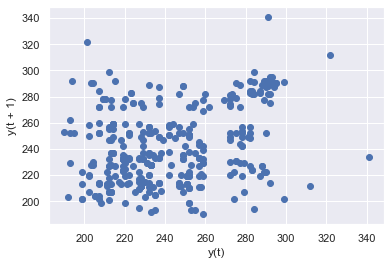

In [57]:
# Lag Plot
from pandas.plotting import lag_plot
lag_plot(df1['Total Inpatient Beds'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

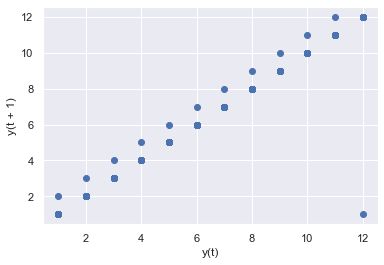

In [92]:
# Lag Plot ==> related to month
from pandas.plotting import lag_plot
lag_plot(df1['month'])

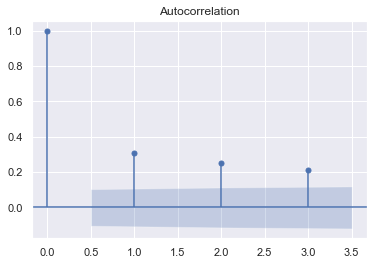

In [61]:
#Auto correlation plot
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(df['Total Inpatient Beds'],lags=3)
plt.show()

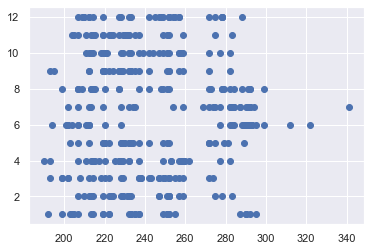

In [88]:
# Scatter Plot betweeen years and Total Inpatient beds
plt.scatter(x='Total Inpatient Beds',y='month',data=df1)

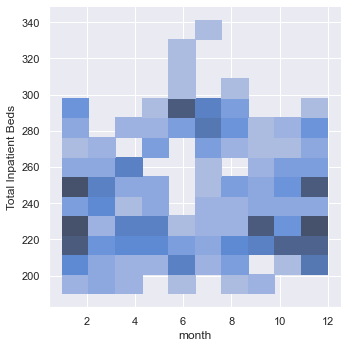

In [90]:
sns.displot(df1,x="month",y='Total Inpatient Beds')
# from this plot we can cleary seen from the month seven we have highes Inpatient Beds

In [91]:
df1['month'].values

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [69]:
df

,collection_date,Total Inpatient Beds,year,month
0,15-06-2020,293,2021,06
1,16-06-2020,295,2021,06
2,17-06-2020,290,2021,06
3,18-06-2020,291,2021,06
4,19-06-2020,288,2021,06
...,...,...,...,...
354,11-06-2021,312,2021,06
355,12-06-2021,212,2021,06
356,13-06-2021,299,2021,06
357,14-06-2021,202,2021,06
